In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_model_linlog import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.full.myfun_density import *
from ipynb.fs.full.myfun_model_usefulfuns import *

2024-03-08 13:00:35.023197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 13:00:35.023226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 13:00:35.024114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 13:00:35.030050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-08 13:00:36.061091: W tensorflow/compiler/tf2

# Preliminary: load NN model

In [2]:
dir_nn10 = "2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"
# dir_nn10_v2 = "2024-03-04_03-44-51_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10-v2"

target_dir = "./out/"
namefile_model_nn = "/model_nn10.keras"

In [3]:
# Load NN10 model
dir_nn = dir_nn10
# dir_nn = dir_nn10_v2

path = target_dir + dir_nn
model_nn = keras.models.load_model(path + namefile_model_nn)

## Preliminary

In [4]:
flag_save = False

In [5]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_contour_ic1")
    
    path = 'out/' + d
    os.mkdir(path)

# Contour plot: equispaced case

## Preliminary

In [6]:
## Params
Nx = 400
Nt = 320
T = .5

In [7]:
# # Space - linearly distributed
# dx = 1/int(Nx/3)
# a = np.linspace(-1,0,int(Nx/3))
# b = np.linspace(0+dx/2, 1, Nx-int(Nx/3))
# # xspan = np.concatenate([a, b])

# # Time
# tspan = np.linspace(0,T,Nt)
# tspan_rounded = list(np.round(tspan,2))

In [8]:
# Space - linearly distributed
xspan = np.linspace(-1,1,Nx)

# Time
tspan = np.linspace(0,T,Nt)

## Simulations

### LIN

In [9]:
# Model params
L_lin = .0025
v0 = 1

# Solving the ODE
sol_lin = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L_lin, 'Lin'), tfirst = True).T

# Discretized density
ln = 1/Nx
rho_dis_lin = ln/np.diff(sol_lin, axis=0)

In [10]:
# Density and car trajs matrices
DM_lin = []
CTM_lin = []
for i_t in range(len(tspan)):
    
    # Density matrix
    tmp1 = rho_dis_lin[:,i_t] # density sliced at time tspan[i_t]
    DM_lin.append(tmp1.flatten().tolist())
    
    # Car Trajs matrix
    tmp2 = sol_lin[:,i_t][1:]
    CTM_lin.append(tmp2.flatten().tolist())
    
TM_lin = [[t]*(Nx-1) for t in tspan]

In [11]:
# len(DM_lin), len(CTM_lin), len(TM_lin), len(DM_lin[0]), len(CTM_lin[0]), len(TM_lin[0])

### LOG

In [12]:
# Model params
L_log = .001875
v0 = 1

# Solving the ODE
sol_log = odeint(TD_LWR_model, xspan, tspan, args=(Nx, v0, L_log, 'Log'), tfirst = True).T

# Discretized density
ln = 1/Nx
rho_dis_log = ln/np.diff(sol_log, axis=0)

In [13]:
# Density and car trajs matrices
DM_log = []
CTM_log = []
for i_t in range(len(tspan)):
    
    # Density matrix
    tmp1 = rho_dis_log[:,i_t] # density sliced at time tspan[i_t]
    DM_log.append(tmp1.flatten().tolist())
    
    # Car Trajs matrix
    tmp2 = sol_log[:,i_t][1:]
    CTM_log.append(tmp2.flatten().tolist())
    
TM_log= [[t]*(Nx-1) for t in tspan]

In [14]:
# len(DM_log), len(CTM_log), len(TM_log), len(DM_log[0]), len(CTM_log[0]), len(TM_log[0])

### NN10

In [15]:
# ODE computation
normalize_flag = True
t_list, sol_ann_list, v_list = nn_odesolver(model_nn, Nx, xspan, tspan, normalize_flag)

## Discretized density reconstruction
ln = 1/Nx
rho_dis_ann = ln/np.diff(sol_ann_list, axis=0)

In [16]:
# Density and car trajs matrices
DM_nn = []
CTM_nn = []
for i_t in range(len(tspan)):
    
    # Density matrix
    tmp1 = rho_dis_ann[:,i_t] # density sliced at time tspan[i_t]
    DM_nn.append(tmp1.flatten().tolist())
    
    # Car Trajs matrix
    tmp2 = sol_ann_list[:,i_t][1:]
    CTM_nn.append(tmp2.flatten().tolist())
    
TM_nn = [[t]*(Nx-1) for t in tspan]

In [17]:
# len(DM_nn), len(CTM_nn), len(TM_nn), len(DM_nn[0]), len(CTM_nn[0]), len(TM_nn[0])

## Plot

### LIN

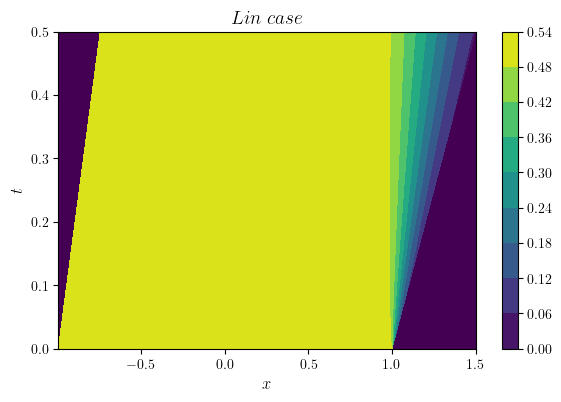

In [18]:
# Initialize the fig
nrow, ncol = 1, 1
width, height = 8,5.5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

X = CTM_lin
Y = TM_lin
Z = DM_lin

cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)

# Mask blank areas
cmap = cs.get_cmap()
colors = cmap(np.linspace(0, 1, 10))
plt.gca().patch.set_color(colors[0])

# ax.set_xlim([-1,2])
ax.set_ylim([0, T])
ax.set_xlabel(r"$x$",fontsize=12)
ax.set_ylabel(r"$t$",fontsize=12)
ax.set_title(fr"$Lin\ case$",fontsize=14)

fig.tight_layout()
plt.show()

# Save figure
if flag_save:

    title = f"/contour_lin_ic1"     
    fig.savefig(path+title+ext, bbox_inches='tight')

### LOG

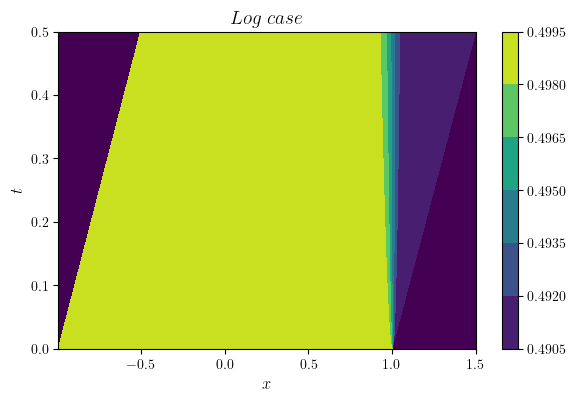

In [19]:
# Initialize the fig
nrow, ncol = 1, 1
width, height = 8,5.5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

X = CTM_log
Y = TM_log
Z = DM_log

cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)

# Mask blank areas
cmap = cs.get_cmap()
colors = cmap(np.linspace(0, 1, 10))
plt.gca().patch.set_color(colors[0])

# ax.set_xlim([-1,2])
ax.set_ylim([0, T])
ax.set_xlabel(r"$x$",fontsize=12)
ax.set_ylabel(r"$t$",fontsize=12)
ax.set_title(fr"$Log\ case$",fontsize=14)

fig.tight_layout()
plt.show()

# Save figure
if flag_save:

    title = f"/contour_log_ic1"     
    fig.savefig(path+title+ext, bbox_inches='tight')

### NN10

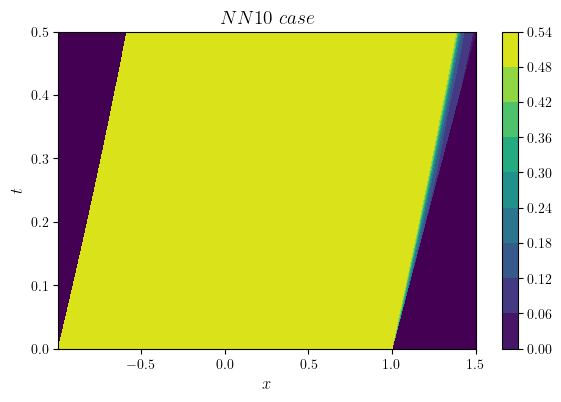

In [20]:
# Initialize the fig
nrow, ncol = 1, 1
width, height = 8,5.5 # single subplot
fig, ax = plt.subplots(nrow,ncol,figsize=(width*ncol*.75,height*.75))

X = CTM_nn
Y = TM_nn
Z = DM_nn

cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)

# Mask blank areas
cmap = cs.get_cmap()
colors = cmap(np.linspace(0, 1, 10))
plt.gca().patch.set_color(colors[0])

# ax.set_xlim([-1,2])
ax.set_ylim([0, T])
ax.set_xlabel(r"$x$",fontsize=12)
ax.set_ylabel(r"$t$",fontsize=12)
ax.set_title(fr"$NN10\ case$",fontsize=14)

fig.tight_layout()
plt.show()

# Save figure
if flag_save:

    title = f"/contour_nn_ic1"     
    fig.savefig(path+title+ext, bbox_inches='tight')